# Read the prediction

In [98]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

path = '/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_14.pkl'

with open(path, "rb") as file:
    rollout_data = pickle.load(file)

init_pos = rollout_data['initial_positions']
pred_pos = rollout_data['predicted_rollout']
gt_pos = rollout_data['ground_truth_rollout']
gt_pos = np.concatenate((init_pos, gt_pos), axis=0)
pred_pos = np.concatenate((init_pos, pred_pos), axis=0)

init_strain = rollout_data['initial_strains']
pred_strain = rollout_data['predicted_strain']
gt_strain = rollout_data['ground_truth_strain']
# gt_strain = np.concatenate((init_strain, gt_strain), axis=0)
# pred_strain = np.concatenate((init_strain, pred_strain), axis=0)

particle_type = rollout_data['particle_types']

print(gt_pos.shape, pred_strain.shape, gt_strain.shape, particle_type.shape)

(34, 246248, 3) (34, 246248) (34, 246248) (246248,)


# Random ploting beam displacement

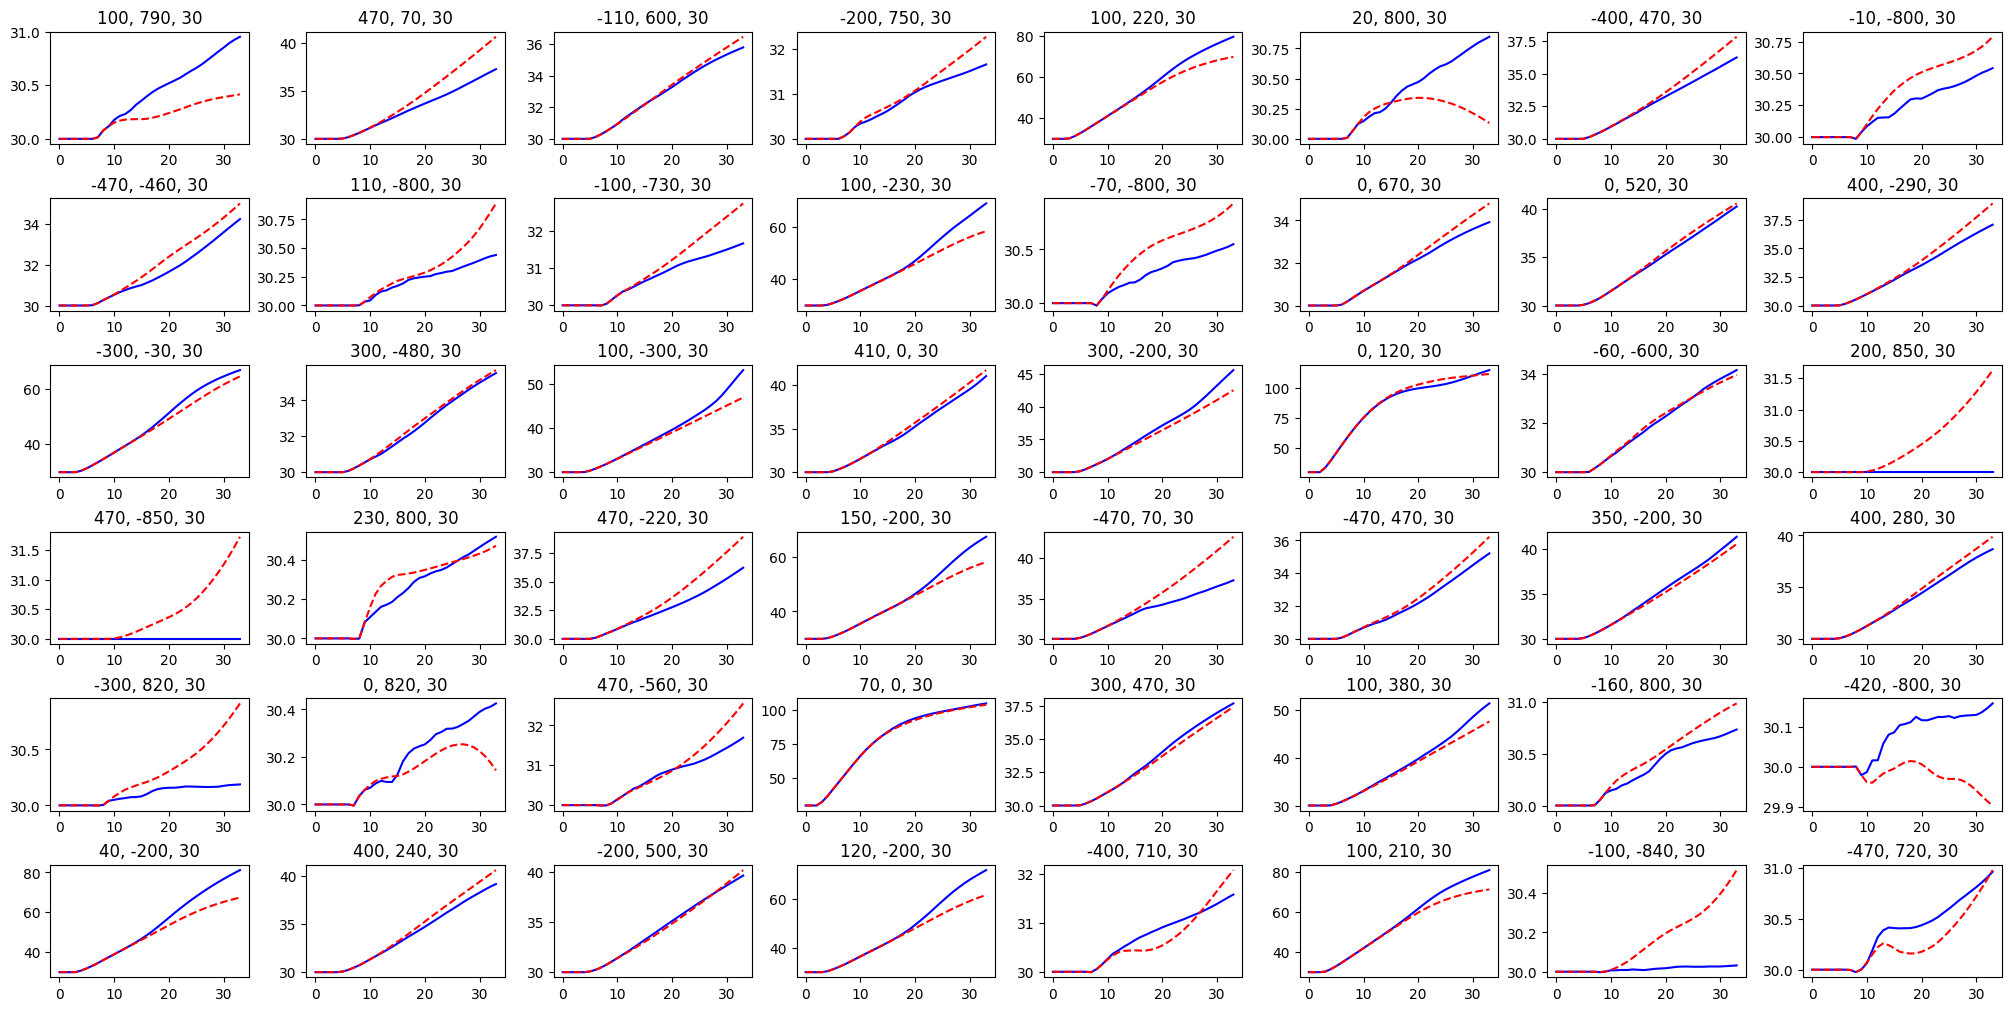

In [2]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
a = np.where(particle_type==1)[0]
idx = np.random.choice(a, 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_pos[:, idx[fig_id], 2], 'b')
    ax.plot(pred_pos[:, idx[fig_id], 2], 'r--')

# Random plotting z displacement

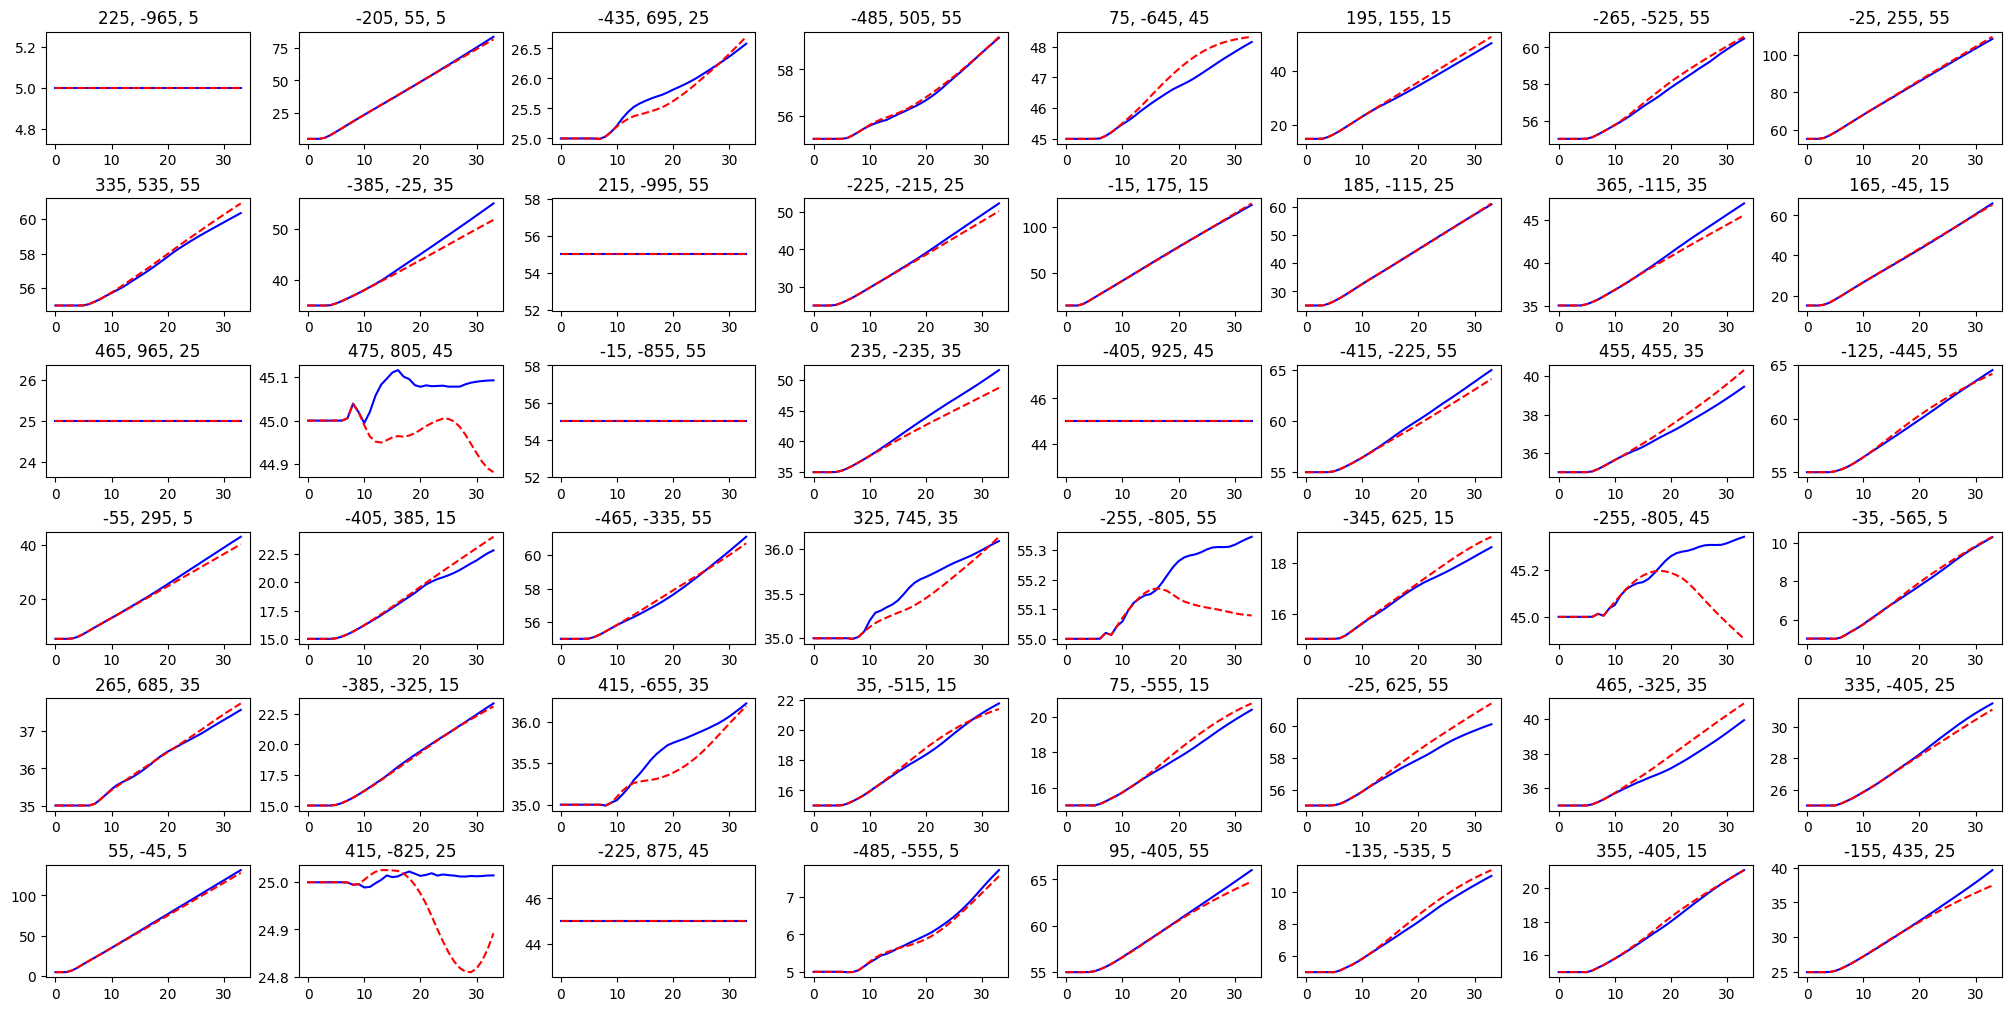

In [3]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_pos[:, idx[fig_id], 2], 'b')
    ax.plot(pred_pos[:, idx[fig_id], 2], 'r--')

# Random ploting velocity

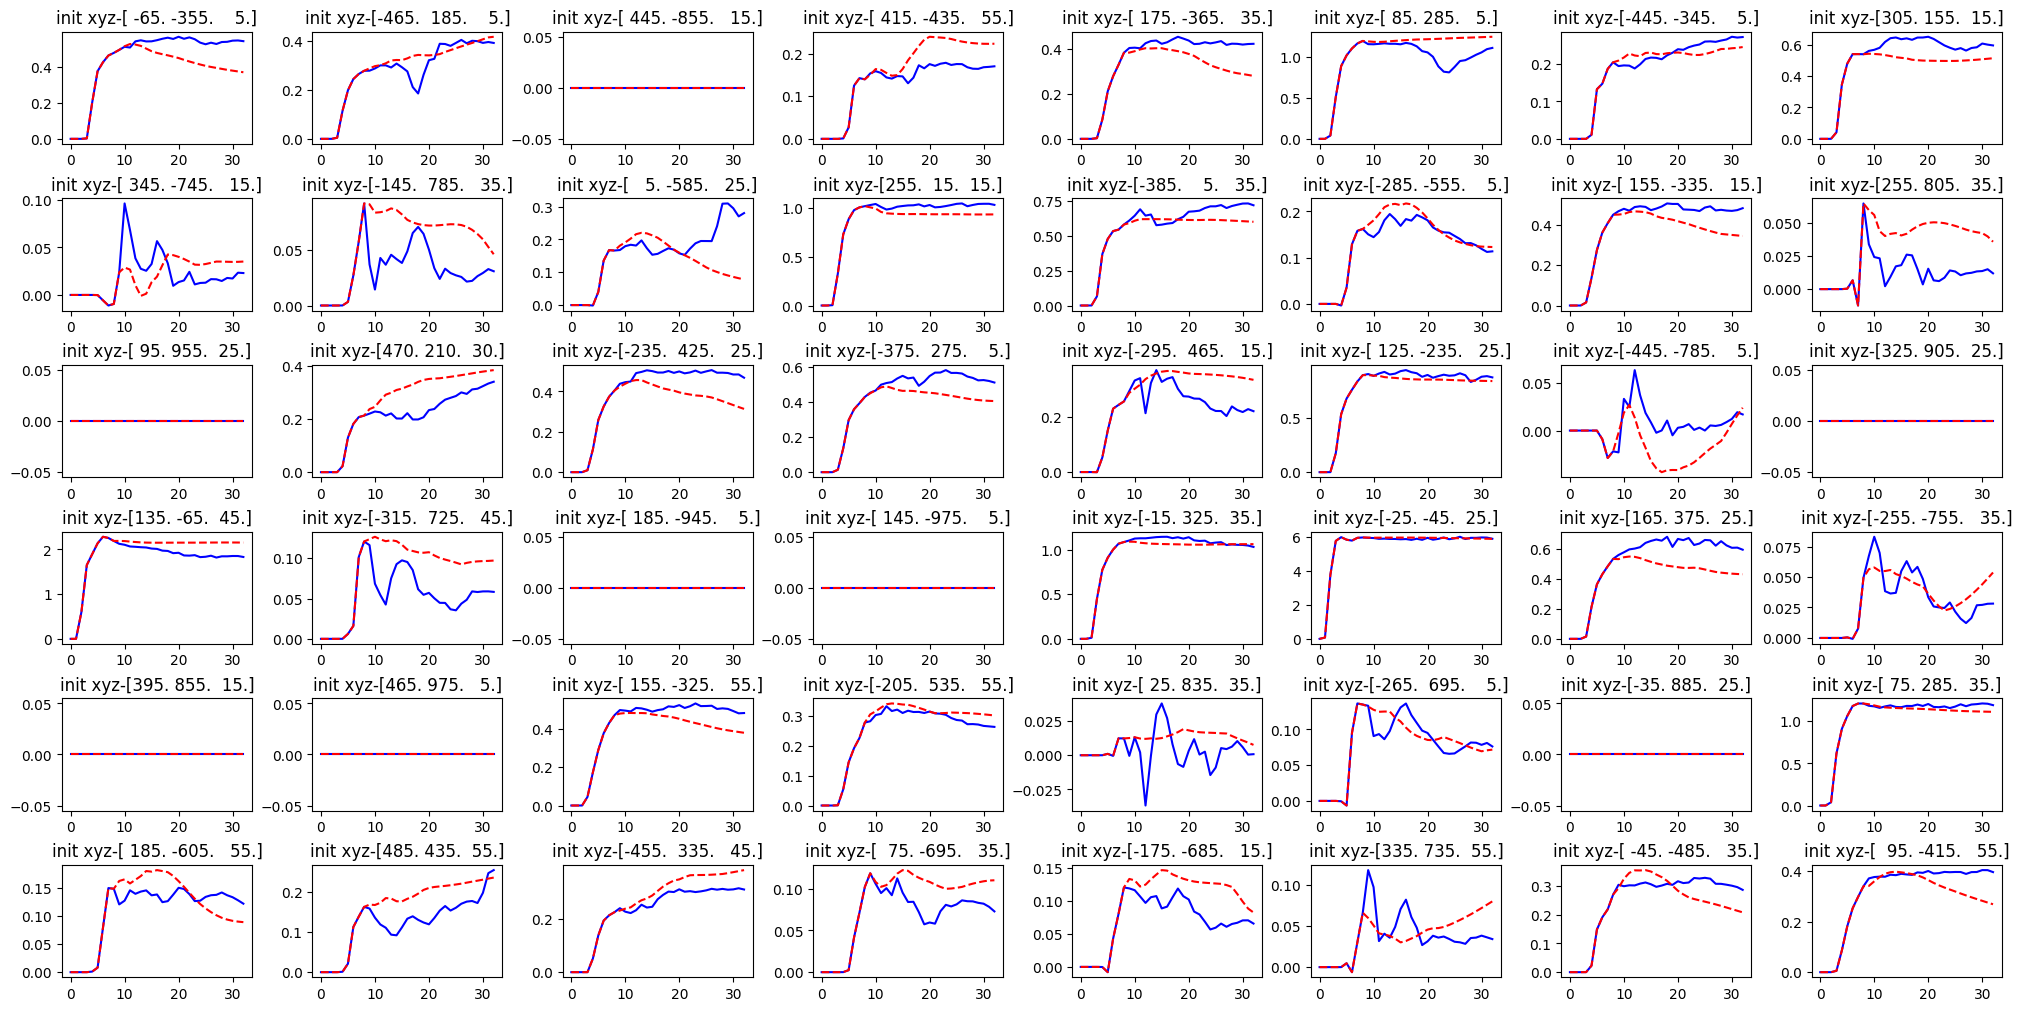

In [4]:
pred_vel = pred_pos[1:, :, :] - pred_pos[:-1, :, :]
gt_vel = gt_pos[1:, :, :] - gt_pos[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_vel[:, idx[fig_id], 2], 'b')
    ax.plot(pred_vel[:, idx[fig_id], 2], 'r--')

# Random ploting acc

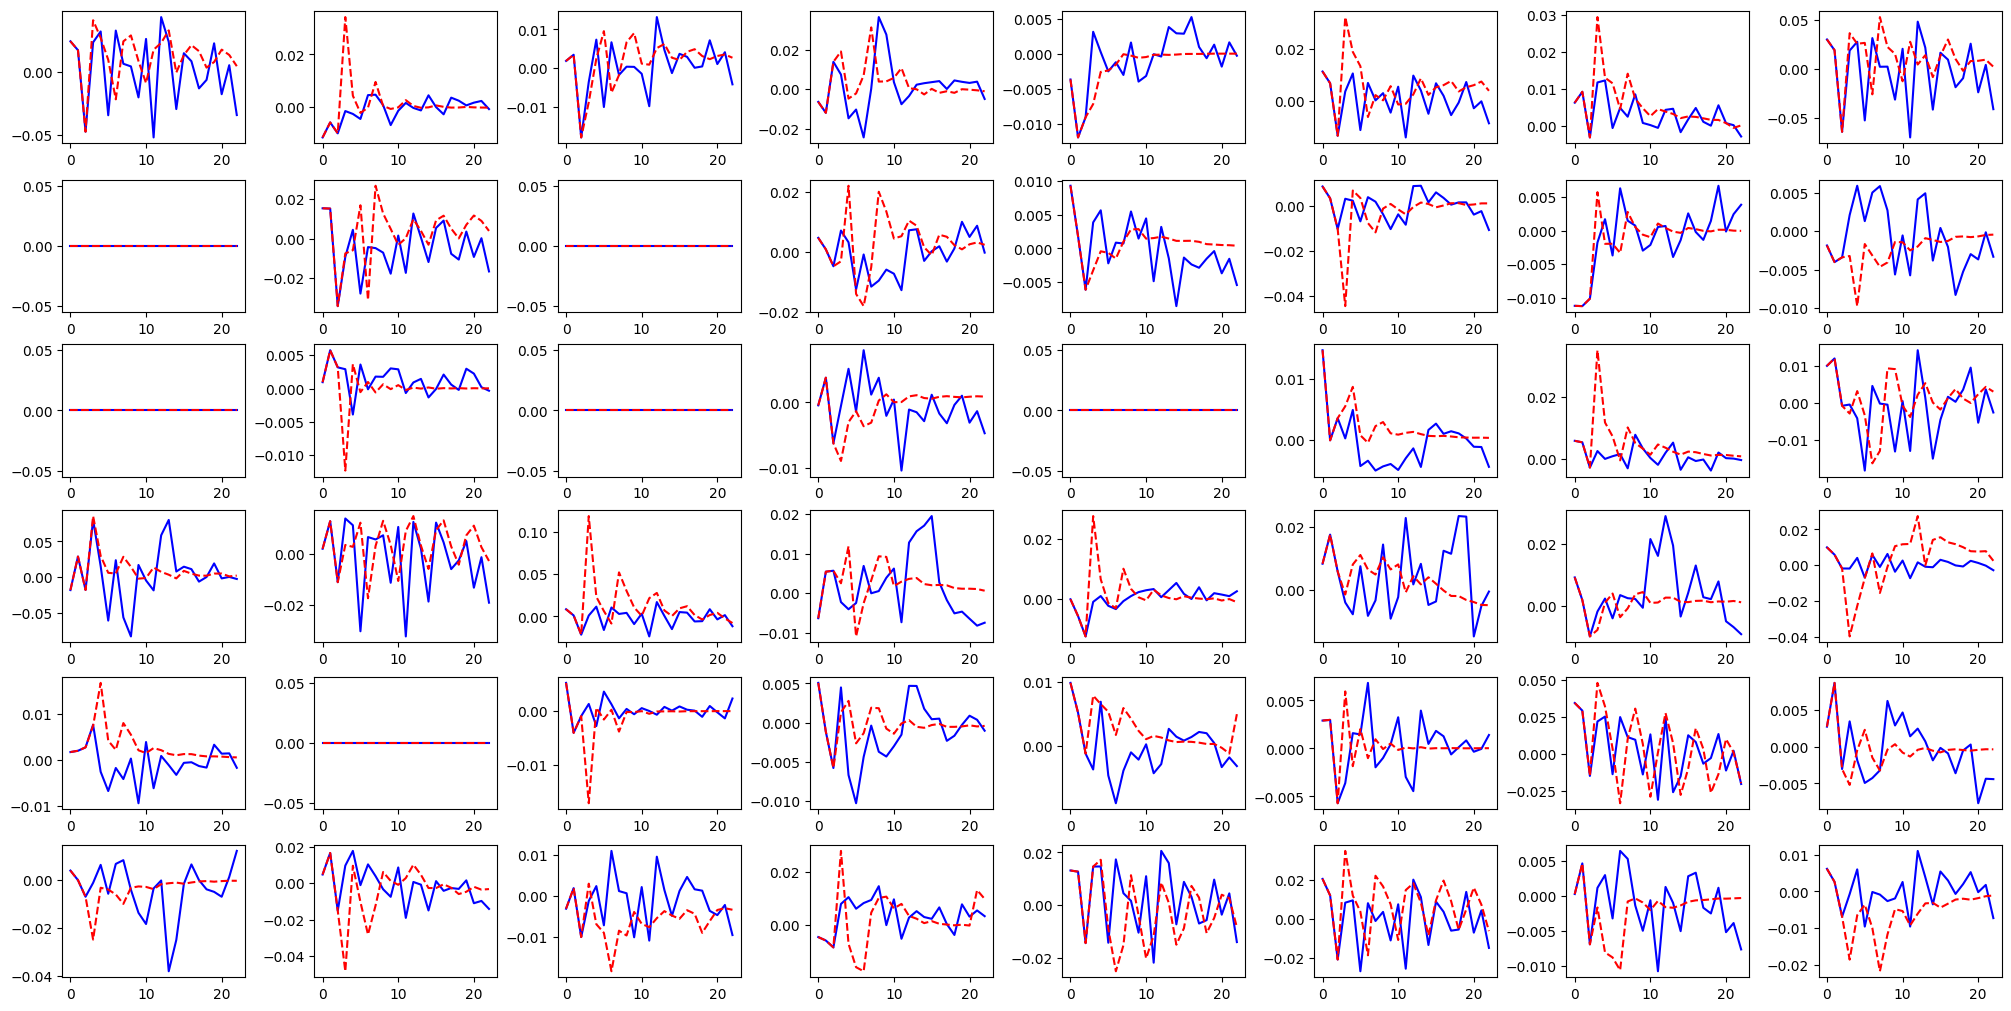

In [117]:
pred_acc = pred_vel[1:, :, :] - pred_vel[:-1, :, :]
gt_acc = gt_vel[1:, :, :] - gt_vel[:-1, :, :]

fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    ax.set_title(f'init xyz-{gt_pos[0, idx[fig_id]]}')
    ax.plot(gt_acc[:, idx[fig_id], 2], 'b')
    ax.plot(pred_acc[:, idx[fig_id], 2], 'r--')

# Random ploting strain

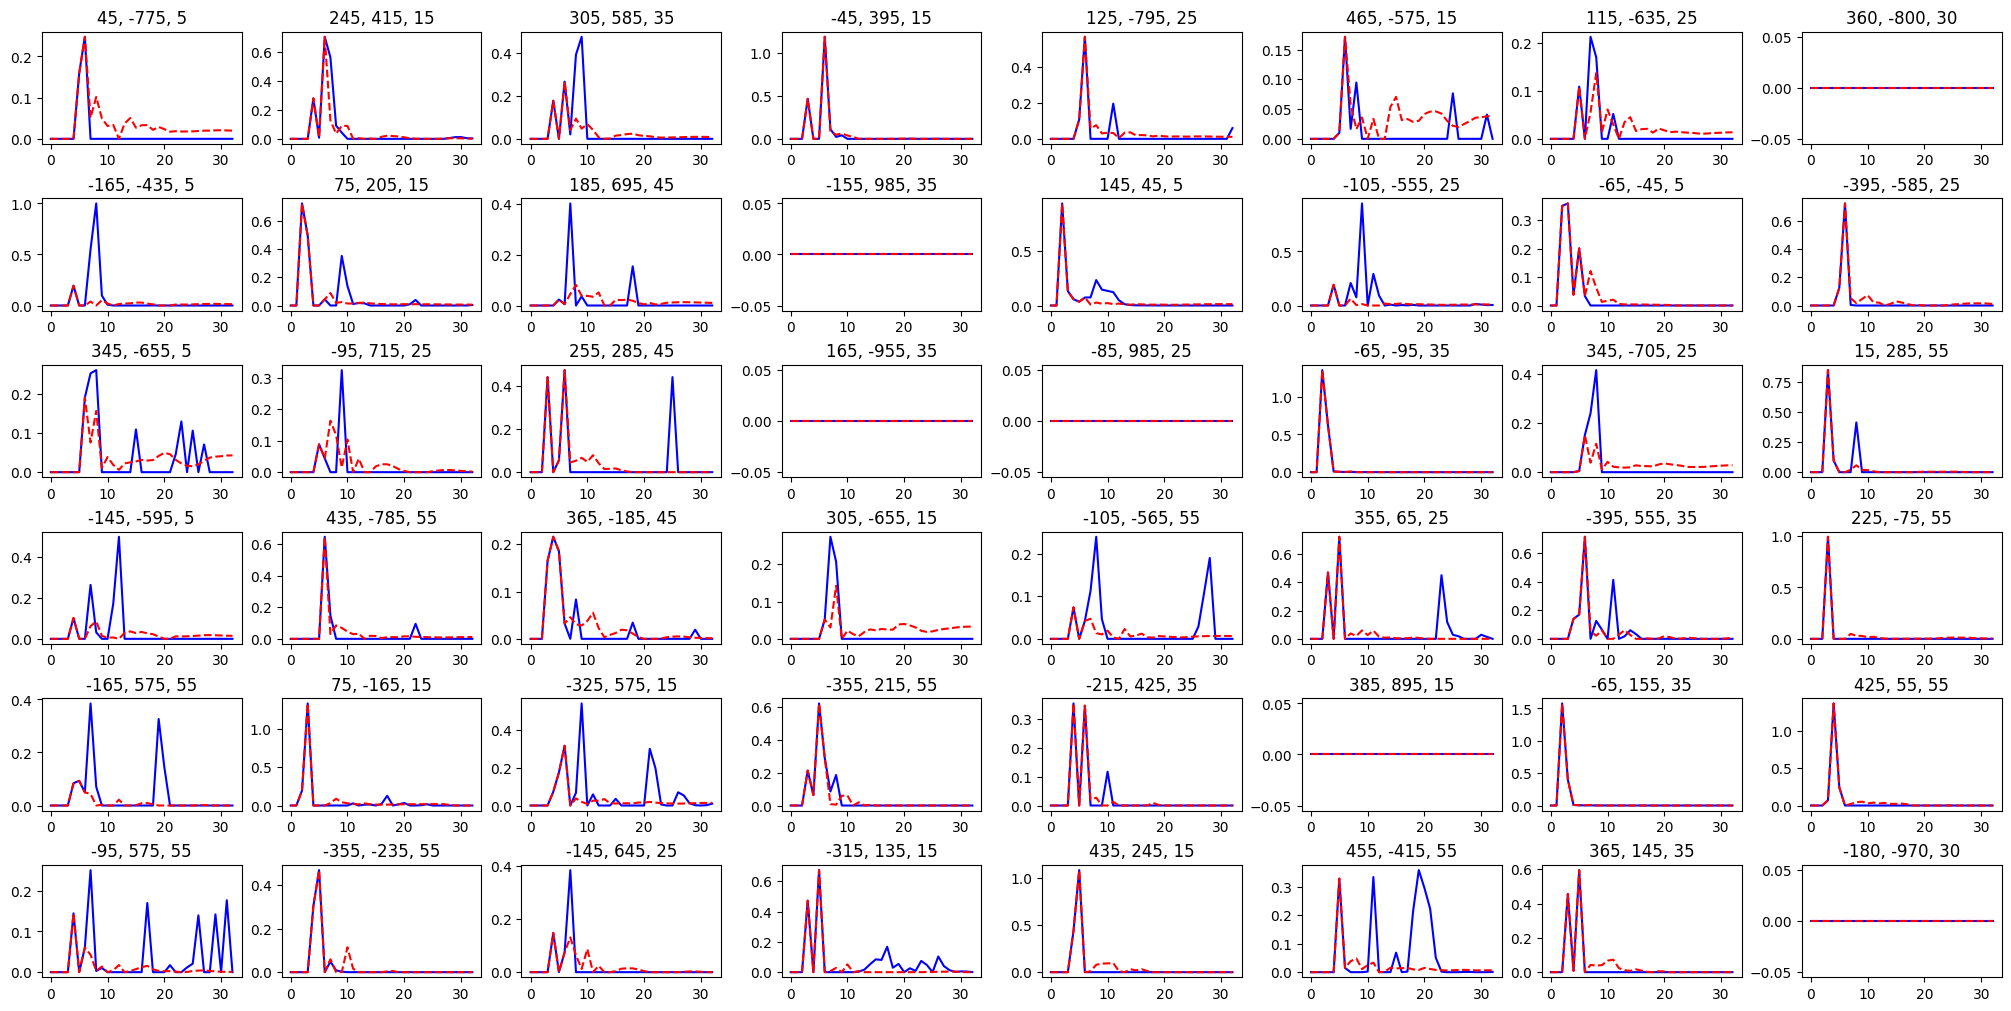

In [31]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_strain[1:, idx[fig_id]]-gt_strain[:-1, idx[fig_id]], 'b')
    ax.plot(pred_strain[1:, idx[fig_id]]-pred_strain[:-1, idx[fig_id]], 'r--')

# Random ploting gt strain from step 0

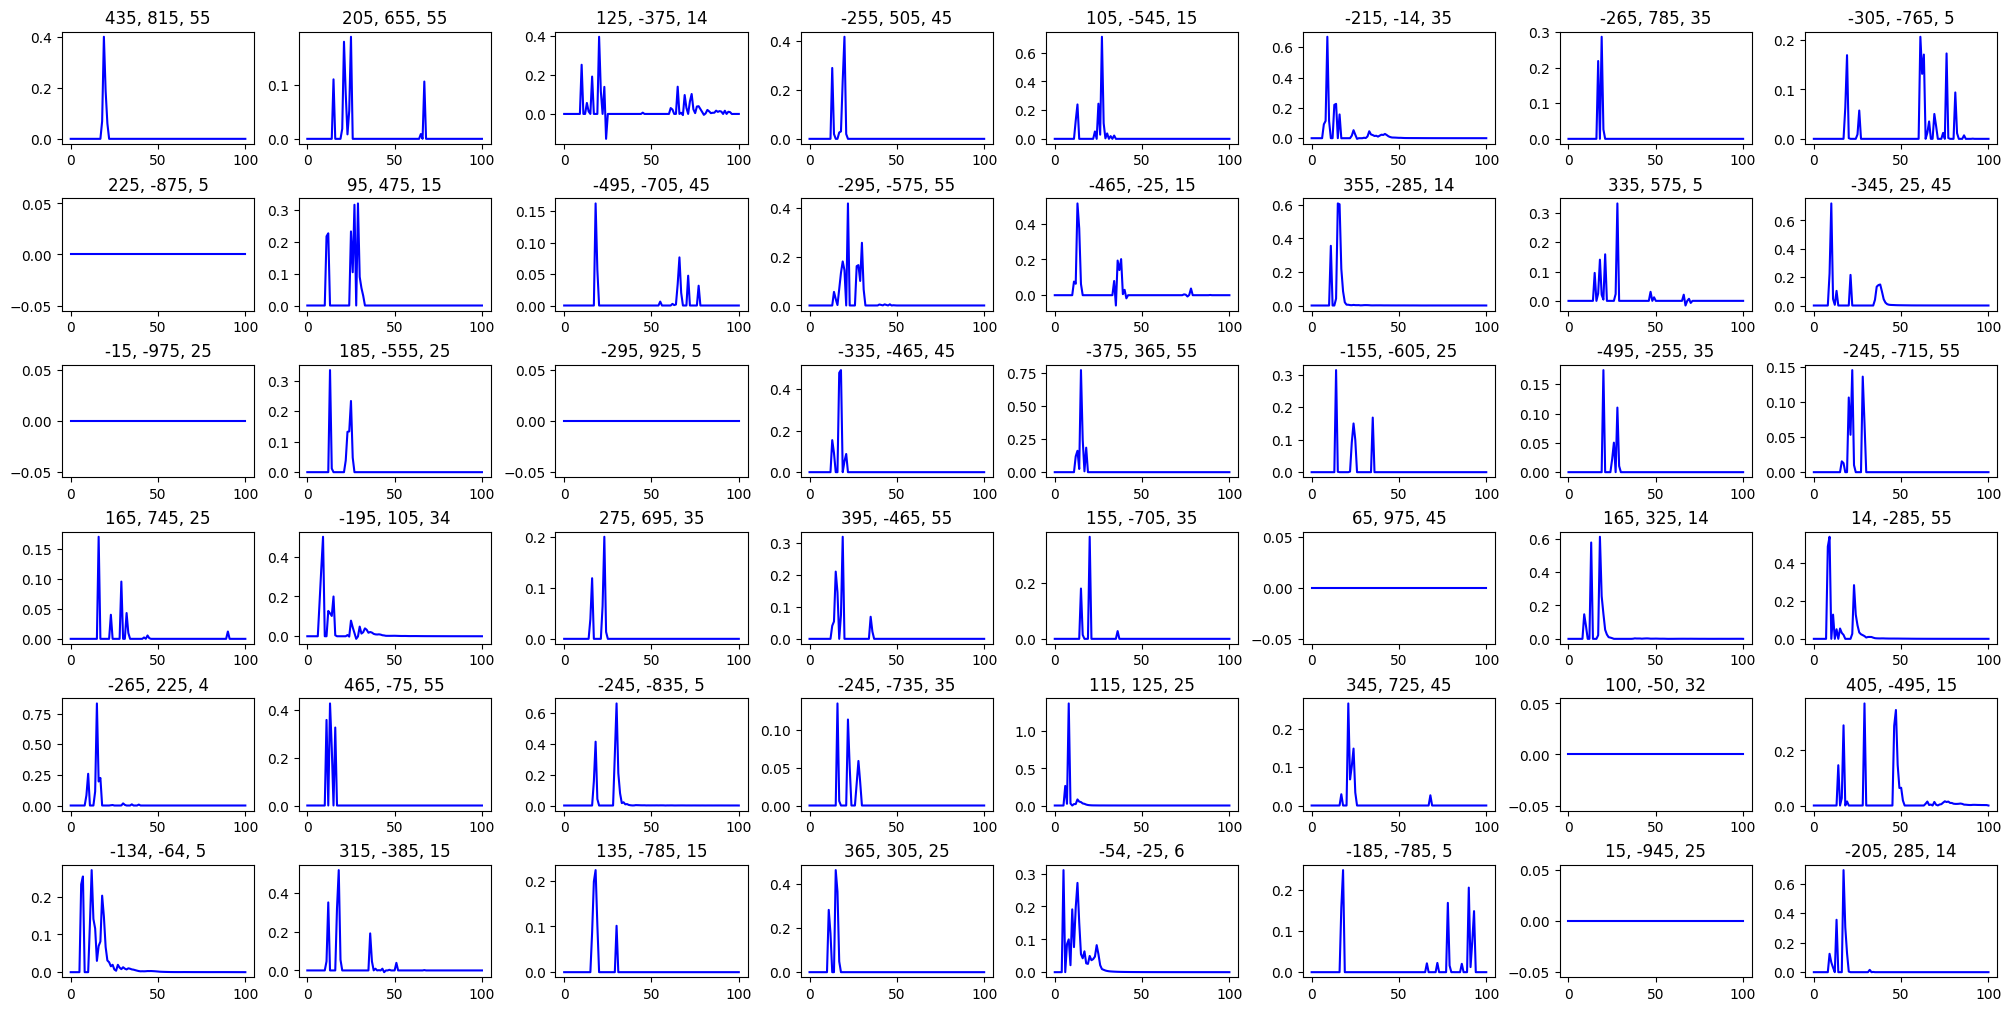

In [16]:
data = np.load('/home/jovyan/share/8TB-share/qilin/fragment/npz/060/000_60_5_0.4C50.npz')
gt_strain = data['strains']
gt_strain = gt_strain[1:, :] - gt_strain[:-1, :]
fig = plt.figure(figsize=(20,10), constrained_layout=True)
idx = random.sample(range(123068), 48)

for fig_id in range(48):
    ax = fig.add_subplot(6, 8, fig_id+1)
    x, y, z = gt_pos[0, idx[fig_id]]
    x, y, z = int(x), int(y), int(z)
    ax.set_title(f'{x}, {y}, {z}')
    ax.plot(gt_strain[:, idx[fig_id]], 'b')

# Extract image from gif

In [45]:
from PIL import Image

# Open the GIF file
idx = 1
gif_path = f'/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_0_one_step.gif'
gif = Image.open(gif_path)

# Iterate over each frame in the GIF
frame_images = []
for frame_index in range(gif.n_frames):
    # Go to the current frame
    gif.seek(frame_index)

    # Extract the current frame as an image
    frame_image = gif.copy()
    frame_images.append(frame_image)

# Save each frame as an individual image
output_dir = '/home/jovyan/work/gns-fragment/rollouts/Fragment/'
for i, frame_image in enumerate(frame_images):
    frame_image.save(f'{output_dir}rollout_{idx:02}_frame_{i:02}.png')

# Extract fragment from result

In [1]:
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

path = '/home/jovyan/work/gns-fragment/rollouts/Fragment/rollout_14.pkl'

with open(path, "rb") as file:
    rollout_data = pickle.load(file)

init_pos = rollout_data['initial_positions']
pred_pos = rollout_data['predicted_rollout']
gt_pos = rollout_data['ground_truth_rollout']
gt_pos = np.concatenate((init_pos, gt_pos), axis=0)
pred_pos = np.concatenate((init_pos, pred_pos), axis=0)
case = rollout_data["metadata"]["file_test"][14]
print(f"{case}, shape: {gt_pos.shape}")

010_120_4_0.5C30.npz, shape: (34, 246248, 3)


## Use graph connectivity

In [2]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
from scipy.spatial import ConvexHull

DIST_THRES = 10.2
VEL_THRES = 0.3

def compute_fragment_by_graph(trajectory):
    
    # assuming `trajectory` is a numpy array of shape (mtimestep, nparticles, 3)
    last_positions = trajectory[-1, :, :]
    prev_positions = trajectory[-2, :, :]
    
    # calculate speed of each particle
    velocities = np.linalg.norm(last_positions - prev_positions, axis=1)

    # filter out particles with speed below the threshold
    mask = velocities >= VEL_THRES
    filtered_positions = last_positions[mask]
    filtered_vels = velocities[mask]

    # adjacency matrix, initially all particles are connected
    adjacency_matrix = cdist(filtered_positions, filtered_positions) < DIST_THRES

    # create graph from adjacency matrix
    G = nx.from_numpy_array(adjacency_matrix)

    # find fragments as connected components
    fragments = list(nx.connected_components(G))
    
    return fragments, filtered_positions, filtered_vels

gt_fragments, gt_filtered_positions, gt_filtered_vels = compute_fragment_by_graph(gt_pos)

pred_fragments, pred_filtered_positions, pred_filtered_vels = compute_fragment_by_graph(pred_pos)

print(f"Distance threshold: {DIST_THRES}, Velocity threshold: {VEL_THRES}")
print(f"Total number of fragments: gt-{len(gt_fragments)}, pred-{len(pred_fragments)}")

Distance threshold: 10.2, Velocity threshold: 0.3
Total number of fragments: gt-2498, pred-2061


In [3]:
def compute_fragment_property(fragments, filtered_positions, filtered_vels, num_particle_thres=4):
    # Property include nparticles, diameters, velocities
    nparticles, diameters, vels = [], [], []
    
    for i, fragment in enumerate(fragments):
        fragment_positions = filtered_positions[list(fragment)]

        # calculate size (number of particles in the fragment)
        fragment_nparticle = len(fragment)

        # calculate spatial size (diameter of the fragment)
        if fragment_nparticle >= 2:  # cdist requires at least 2 points
            distances = cdist(fragment_positions, fragment_positions)
            fragment_diameter = distances.max()
        else:
            fragment_diameter = 10  # single element diameter

        # calculate fragment speed
        fragment_vels = filtered_vels[list(fragment)]
        fragment_vel = np.mean(fragment_vels)
        
        nparticles.append(fragment_nparticle)
        diameters.append(fragment_diameter)
        vels.append(fragment_vel)
        
    # Conver list to np array
    nparticles = np.array(nparticles)
    diameters = np.array(diameters)
    vels = np.array(vels)
    
    # Sort fragments based on size
    idx = nparticles.argsort()[::-1]  # descending
    nparticles = nparticles[idx]
    diameters = diameters[idx]
    vels = vels[idx]
        
    return nparticles, diameters, vels

gt_nparticles, gt_diameters, gt_vels = compute_fragment_property(gt_fragments, gt_filtered_positions, gt_filtered_vels)
pred_nparticles, pred_diameters, pred_vels = compute_fragment_property(pred_fragments, pred_filtered_positions, pred_filtered_vels)

Text(0.5, 1.0, 'Histogram of Fragment velocities')

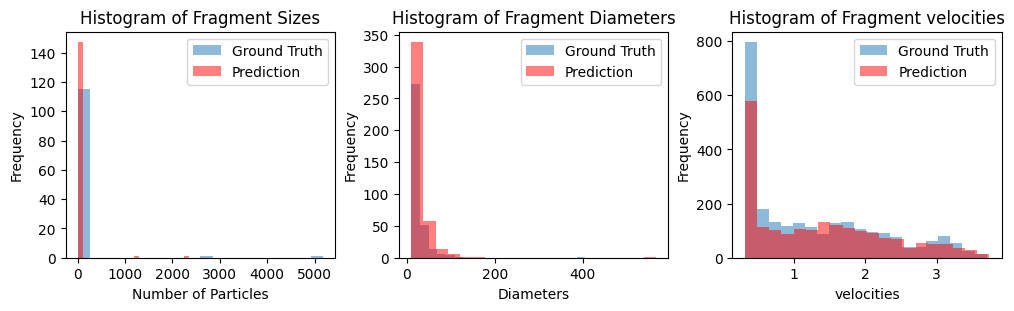

In [4]:
import matplotlib.pyplot as plt

bins=20

fig = plt.figure(figsize=(10,3), constrained_layout=True)

ax = fig.add_subplot(1, 3, 1)
gt_nparticles = gt_nparticles[gt_nparticles>4]
pred_nparticles = pred_nparticles[pred_nparticles>4]
ax.hist(gt_nparticles[1:], bins=bins, alpha=0.5, label='Ground Truth')
ax.hist(pred_nparticles[1:], bins=bins, color='r', alpha=0.5, label='Prediction')
ax.legend(loc='upper right')
ax.set_xlabel('Number of Particles')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fragment Sizes')

ax = fig.add_subplot(1, 3, 2)
gt_diameters = gt_diameters[gt_diameters>10]
pred_diameters = pred_diameters[pred_diameters>10]
ax.hist(gt_diameters[2:], bins=bins, alpha=0.5, label='Ground Truth')
ax.hist(pred_diameters[2:], bins=bins, color='r', alpha=0.5, label='Prediction')
ax.legend(loc='upper right')
ax.set_xlabel('Diameters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fragment Diameters')

ax = fig.add_subplot(1, 3, 3)
gt_vels = gt_vels[gt_vels>0]
pred_vels = pred_vels[pred_vels>0]
ax.hist(gt_vels, bins=bins, alpha=0.5, label='Ground Truth')
ax.hist(pred_vels, bins=bins, color='r', alpha=0.5, label='Prediction')
ax.legend(loc='upper right')
ax.set_xlabel('velocities')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Fragment velocities')

Text(0.5, 0, 'Z')

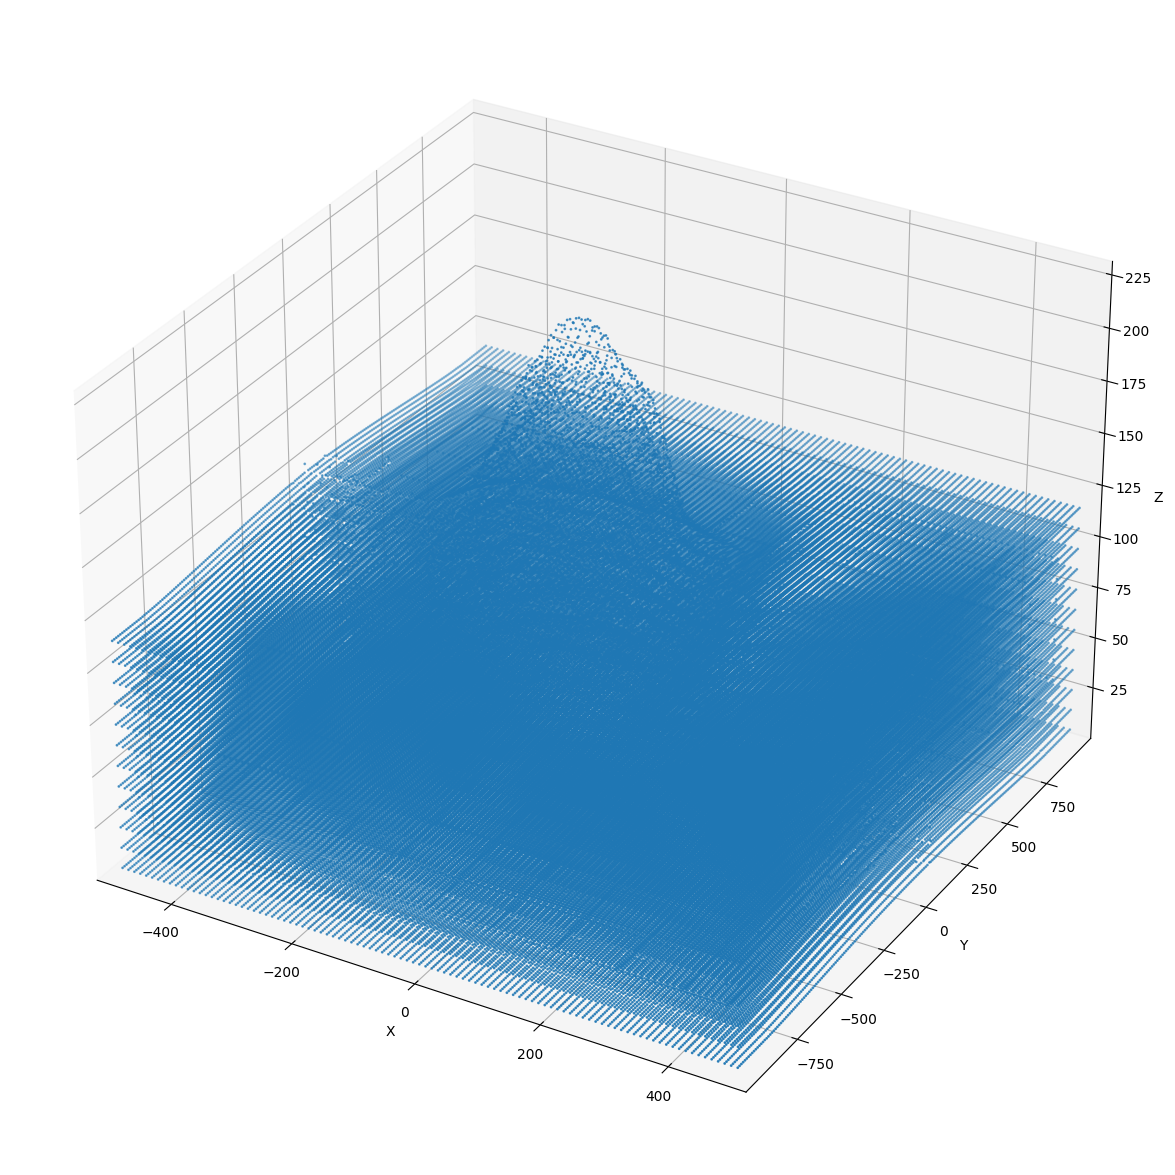

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# assuming `last_positions` is a numpy array of shape (nparticles, 3)
last_positions = gt_pos[-1, :, :]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*last_positions.T, s=1)  # The * operator unpacks the coordinates

# find min and max values
min_val = np.min(last_positions, axis=0)
max_val = np.max(last_positions, axis=0)

# set all axes limits to be the same
ax.set_xlim([min_val[0], max_val[0]])
ax.set_ylim([min_val[1], max_val[1]])
ax.set_zlim([min_val[2], max_val[2]])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [8]:
import plotly.graph_objects as go

# assuming `last_positions` is a numpy array of shape (nparticles, 3)

fig = go.Figure(data=[go.Scatter3d(
    x=last_positions[:, 0],
    y=last_positions[:, 1],
    z=last_positions[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color='blue',                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed